> /work/network_traffic_sample.csv

In [1]:
import pandas as pd

# Reload the CSV file after importing pandas
file_path = 'network_traffic_sample.csv'
network_data = pd.read_csv(file_path)
network_data

,Timestamp,SourceIP,DestinationIP,Protocol,BytesTransferred,Status,Country,Port
0,2025+AC0-05+AC0-17 10:54:00,192.168.20.17,172.217.2.30,DNS,101,ALLOWED,United States,53
1,2025+AC0-05+AC0-17 10:47:00,192.168.20.22,172.217.1.47,HTTPS,8705,ALLOWED,UK,443
2,2025+AC0-05+AC0-17 10:45:00,192.168.20.40,172.217.4.8,HTTPS,1544,ALLOWED,Germany,443
3,2025+AC0-05+AC0-17 09:44:00,192.168.20.40,172.217.3.33,HTTP,8184,ALLOWED,United States,80
4,2025+AC0-05+AC0-17 08:53:00,192.168.20.18,172.217.1.31,SSH,975,BLOCKED,UK,22
...,...,...,...,...,...,...,...,...
195,2025+AC0-05+AC0-17 12:59:00,192.168.1.42,172.217.1.9,HTTPS,4383,ALLOWED,Japan,443
196,2025+AC0-05+AC0-17 09:18:00,192.168.1.20,172.217.2.20,SMTP,6401,BLOCKED,UK,25
197,2025+AC0-05+AC0-17 12:27:00,192.168.1.11,172.217.0.11,DNS,9139,ALLOWED,India,53
198,2025+AC0-05+AC0-17 08:55:00,192.168.1.37,172.217.3.15,DNS,4147,ALLOWED,France,53


The network traffic data has been successfully loaded. Let me know if you need any specific analysis or processing.

> Visualize Protocol by BytesTransferred using a bar chart.

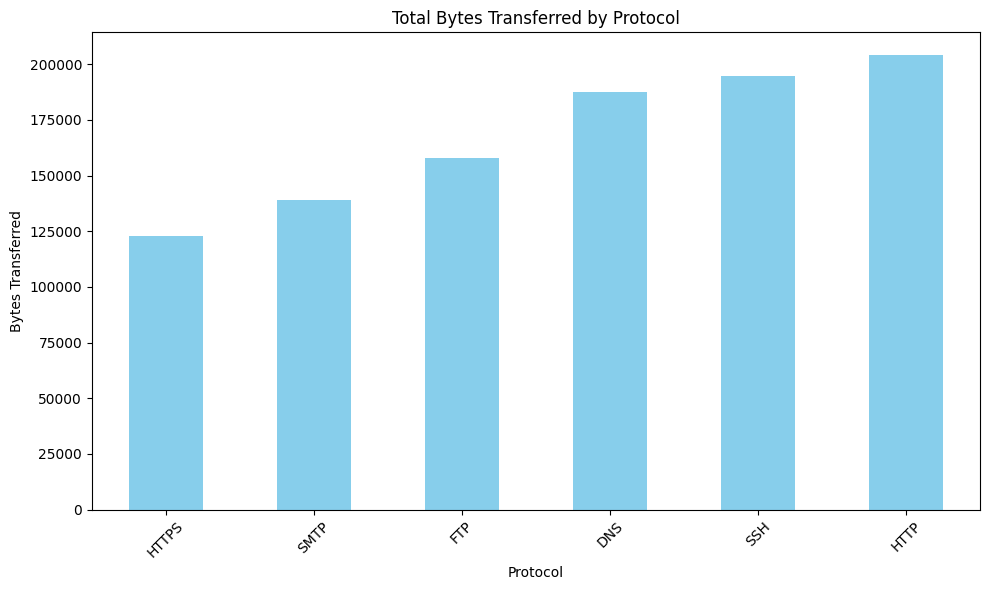

In [2]:
import matplotlib.pyplot as plt

# Group data by Protocol and sum BytesTransferred
protocol_data = network_data.groupby('Protocol')['BytesTransferred'].sum().sort_values()

# Plot the data
plt.figure(figsize=(10, 6))
protocol_data.plot(kind='bar', color='skyblue')
plt.title('Total Bytes Transferred by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Bytes Transferred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart visualizing the total Bytes Transferred by Protocol has been displayed. 

The bar chart summarizes total bytes transferred by protocol, with HTTP leading at approximately 200,000 bytes, followed by SSH at around 190,000 bytes, DNS at about 175,000 bytes, FTP at around 150,000 bytes, SMTP at approximately 135,000 bytes, and HTTPS with the lowest at about 125,000 bytes.

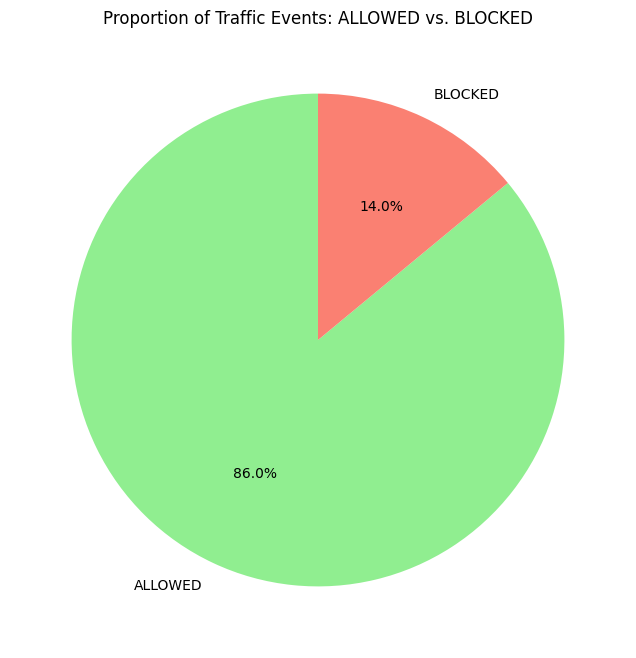

In [3]:
# Count the occurrences of each Status (ALLOWED vs. BLOCKED)
status_counts = network_data['Status'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title('Proportion of Traffic Events: ALLOWED vs. BLOCKED')
plt.ylabel('')  # Remove the y-label for better aesthetics
plt.show()

Traffic events (ALLOWED vs. BLOCKED)

The pie chart summarizes the proportion of traffic events, indicating that 86.0% are ALLOWED and 14.0% are BLOCKED.

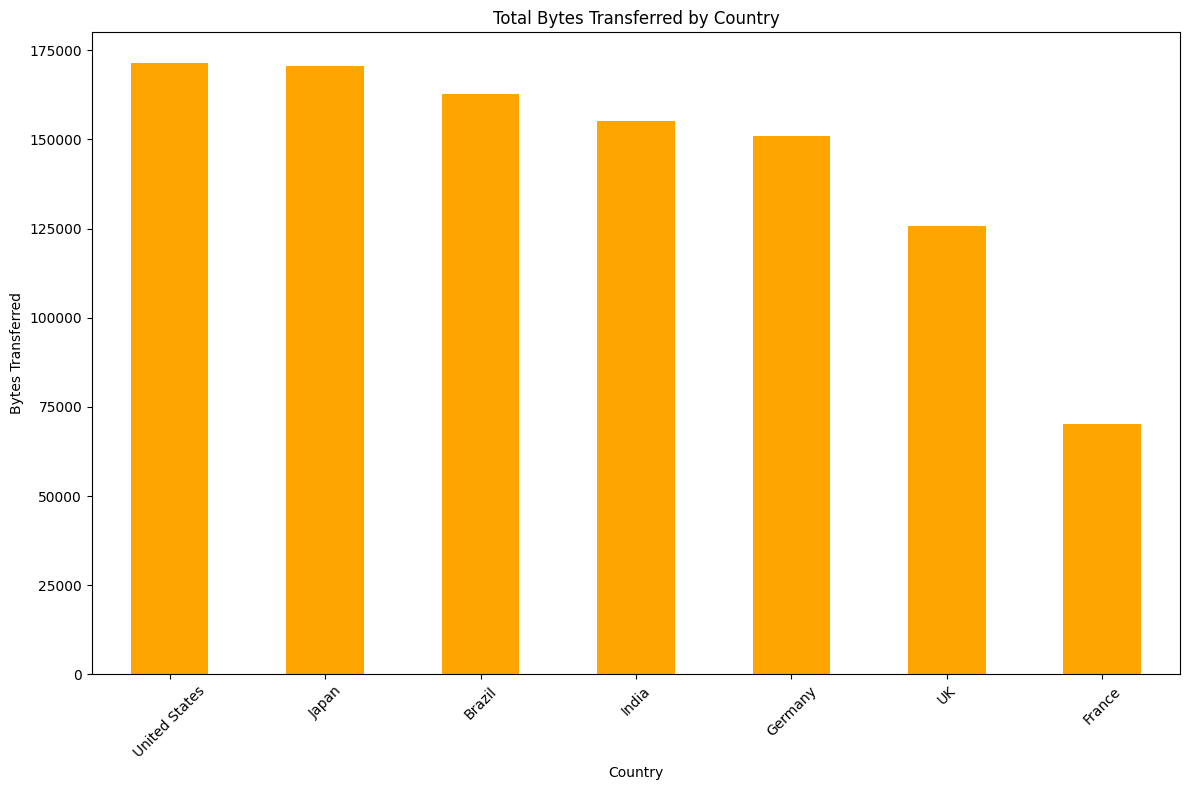

In [4]:
import matplotlib.pyplot as plt

# Group data by Country and sum BytesTransferred
country_traffic = network_data.groupby('Country')['BytesTransferred'].sum().sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 8))
country_traffic.plot(kind='bar', color='orange')
plt.title('Total Bytes Transferred by Country')
plt.xlabel('Country')
plt.ylabel('Bytes Transferred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total Bytes Transferred by Country

The bar chart displays total bytes transferred by country, with the United States and Japan leading at approximately 175,000 bytes each, followed by Brazil at around 165,000 bytes, India at about 150,000 bytes, Germany at approximately 125,000 bytes, the UK at around 75,000 bytes, and France with the lowest at about 70,000 bytes.

 Top 5 protocols by total BytesTransferred

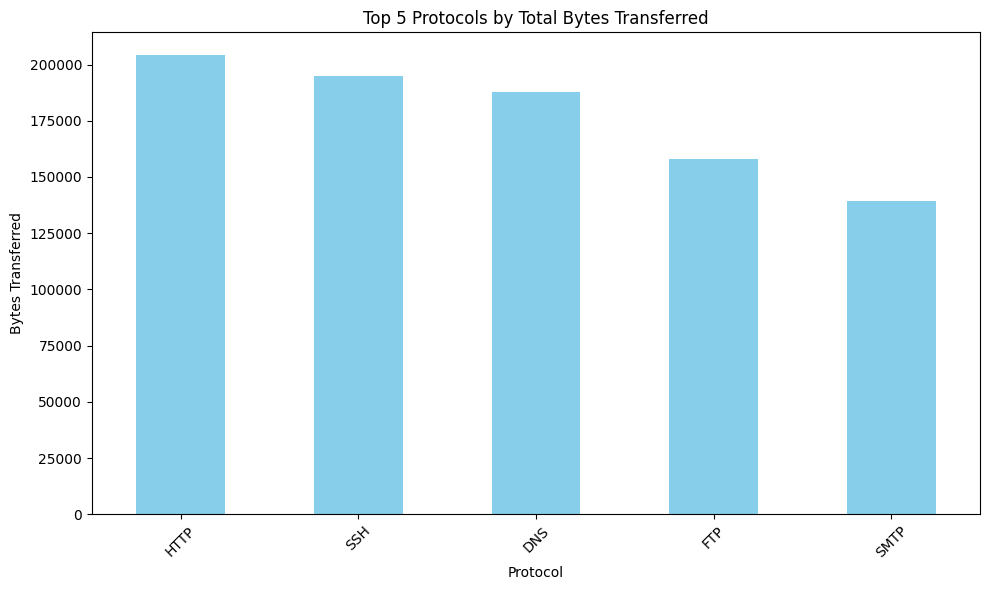

In [5]:
# Identify the top 5 protocols by total BytesTransferred
protocol_top_5 = protocol_data.nlargest(5)

# Plot the data
plt.figure(figsize=(10, 6))
protocol_top_5.plot(kind='bar', color='skyblue')
plt.title('Top 5 Protocols by Total Bytes Transferred')
plt.xlabel('Protocol')
plt.ylabel('Bytes Transferred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart shows the top 5 protocols by total bytes transferred: HTTP leads with around 200,000 bytes, followed by SSH at approximately 190,000 bytes, DNS at about 175,000 bytes, FTP at around 150,000 bytes, and SMTP with the lowest at about 130,000 bytes.

Heatmap to visualize traffic events by country and protocol.

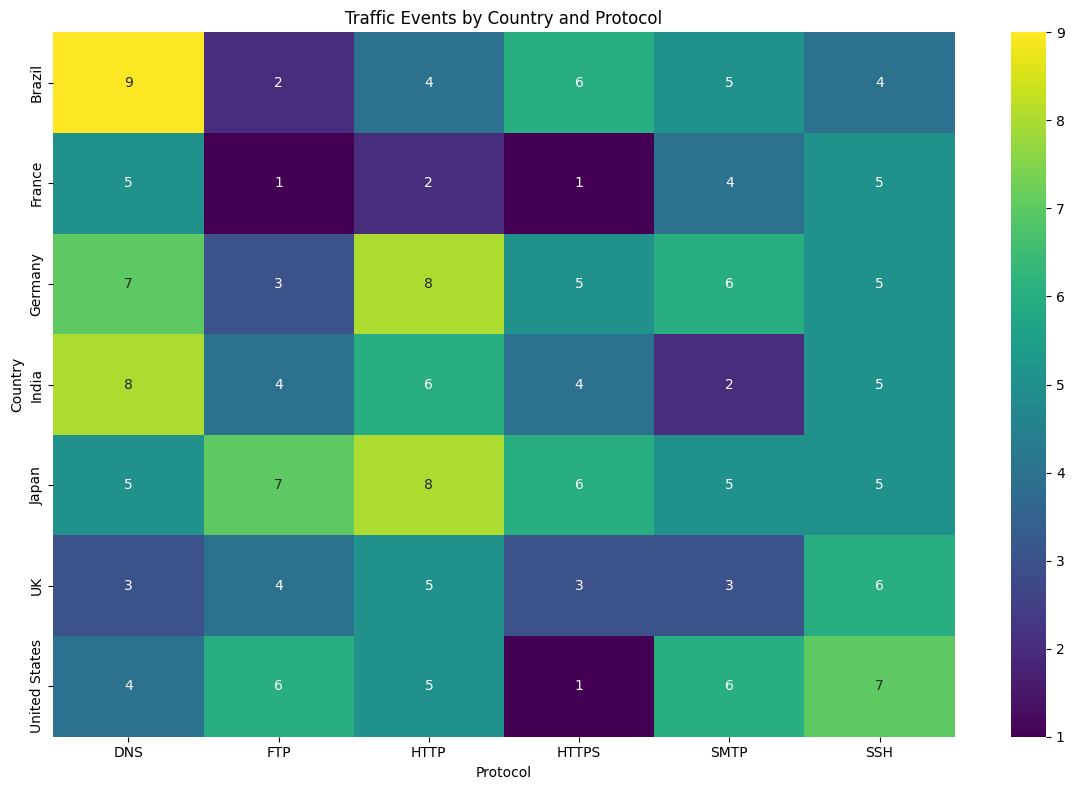

In [6]:
import seaborn as sns

# Prepare data for heatmap
heatmap_data = network_data.groupby(['Country', 'Protocol']).size().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='viridis')
plt.title('Traffic Events by Country and Protocol')
plt.xlabel('Protocol')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Heatmap to visualize traffic events by country and protocol.
The heatmap shows traffic events by country and protocol, with Brazil and India having the highest events (up to 9) for FTP and HTTP respectively, while the UK and the US have lower events (around 1-3) for HTTPS. Other countries like France, Germany, and Japan show moderate to high events across various protocols, with HTTPS and SSH having some of the lowest values (1) in certain cases.

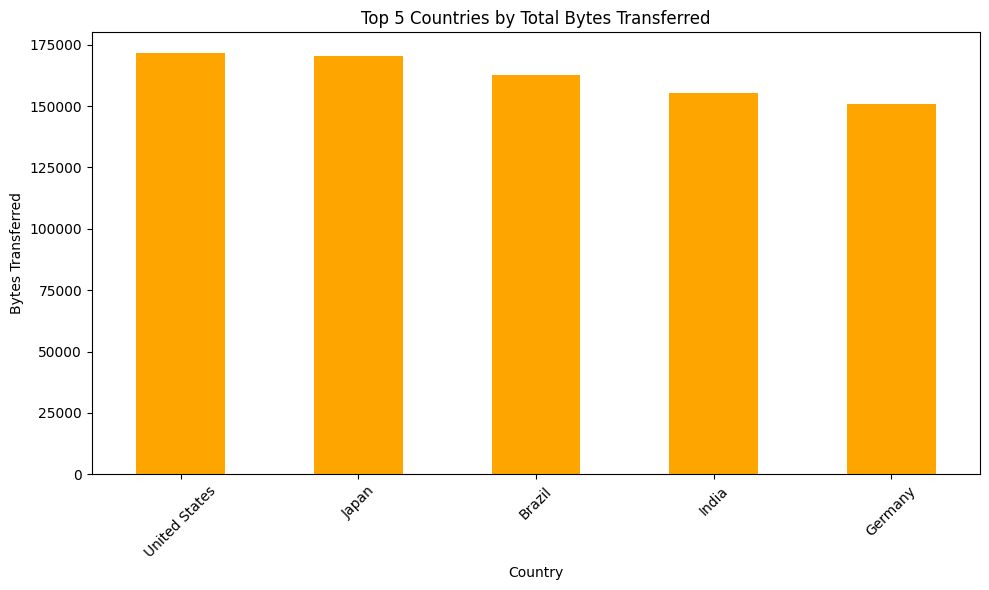

In [7]:
# Identify the top 5 countries by total BytesTransferred
country_top_5 = network_data.groupby('Country')['BytesTransferred'].sum().nlargest(5)

# Plot the data
plt.figure(figsize=(10, 6))
country_top_5.plot(kind='bar', color='orange')
plt.title('Top 5 Countries by Total Bytes Transferred')
plt.xlabel('Country')
plt.ylabel('Bytes Transferred')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 countries by total Bytes Transferred 

The bar chart displays the top 5 countries by total bytes transferred: the United States and Japan lead with approximately 175,000 bytes each, followed by Brazil at around 165,000 bytes, India at about 150,000 bytes, and Germany with the lowest at around 145,000 bytes.


 Perform a time series analysis to identify trends in traffic volume over time.
 

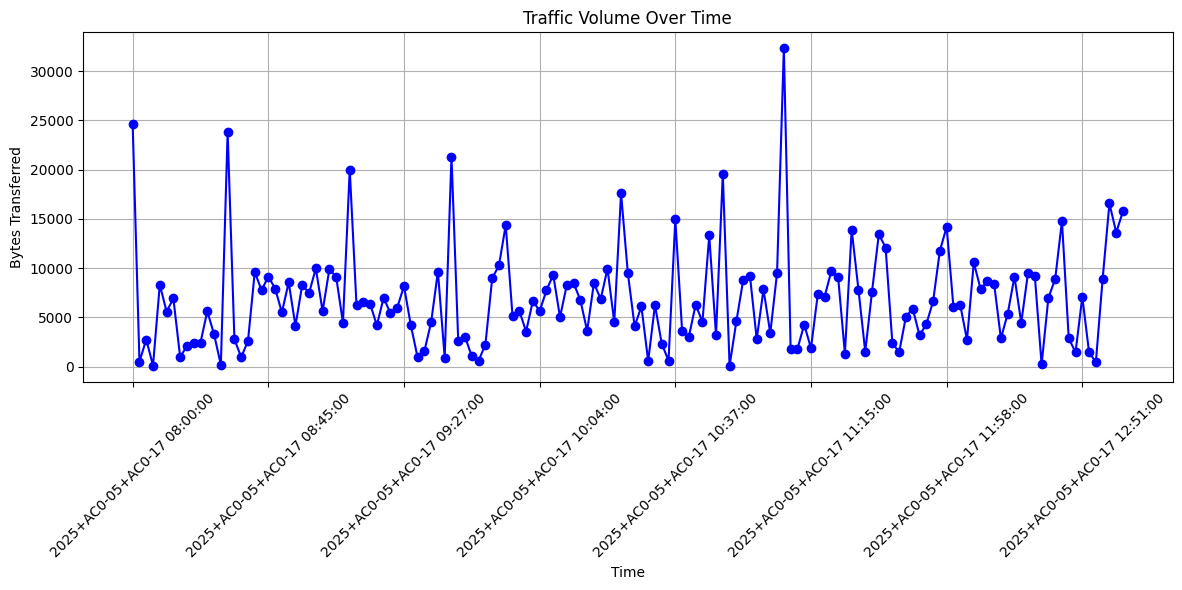

In [8]:
import matplotlib.pyplot as plt

# Aggregate BytesTransferred over time
traffic_volume_over_time = network_data.groupby('Timestamp')['BytesTransferred'].sum()

# Plot the time series data
plt.figure(figsize=(12, 6))
traffic_volume_over_time.plot(marker='o', color='blue')
plt.title('Traffic Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes Transferred')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The time series chart shows traffic volume (in bytes transferred) over time on July 17, 2025, with significant peaks around 07:50:00 (approximately 25,000 bytes), 10:37:00 (around 30,000 bytes), and 11:58:00 (around 20,000 bytes), while other times show more moderate and fluctuating volumes generally between 0 and 15,000 bytes.

> Perform a detailed analysis of traffic patterns based on the time of day.

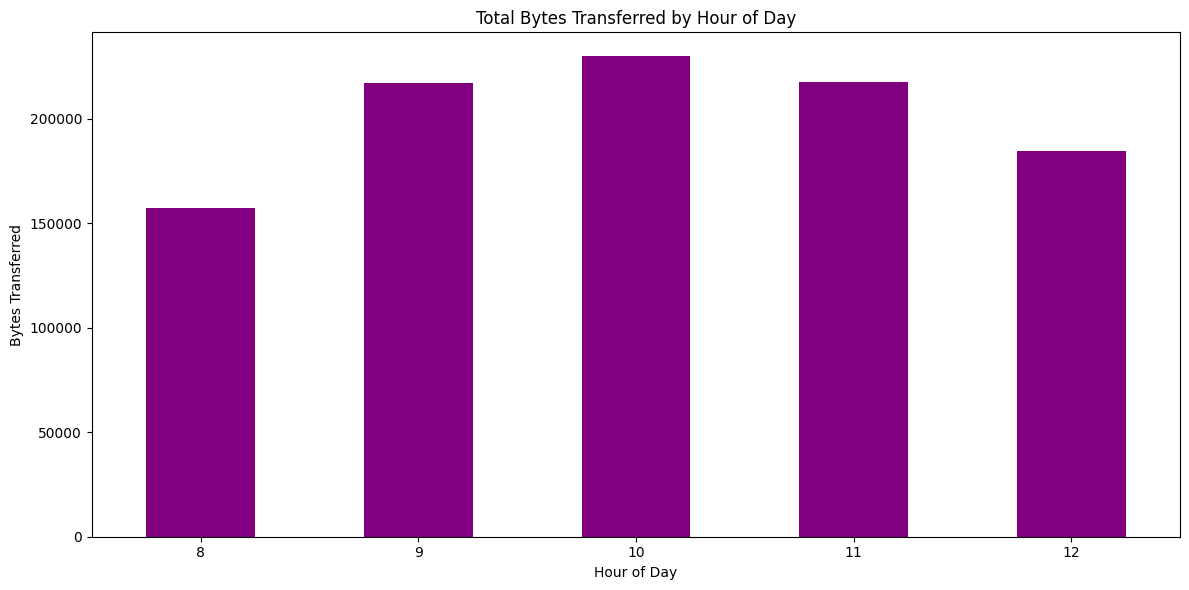

In [38]:
# Extract the hour from the Timestamp for analysis
network_data['Hour'] = pd.to_datetime(network_data['Timestamp']).dt.hour

# Group data by Hour and sum BytesTransferred
hourly_traffic = network_data.groupby('Hour')['BytesTransferred'].sum()

# Plot the data
plt.figure(figsize=(12, 6))
hourly_traffic.plot(kind='bar', color='purple')
plt.title('Total Bytes Transferred by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Bytes Transferred')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The bar chart displays total bytes transferred by hour of day, with peak usage at 9 AM and 10 AM, each around 20,000 bytes, followed by 11 AM at approximately 20,000 bytes, 12 PM at about 18,000 bytes, and 8 AM with the lowest at around 15,000 bytes.